In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/bursteinalan/Data-Sets/master/Housing/House%20Prediction%20Data.csv"

housing = pd.read_csv(url) 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [4]:
df = housing[["SalePrice", "GrLivArea", "GarageArea", "TotalBsmtSF", "CentralAir"]]

In [15]:
df["Aircond"] = df.CentralAir.map({'N':0, 'Y':1})

C:\Users\karji\AppData\Local\Temp/ipykernel_11032/2725677508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Aircond"] = df.CentralAir.map({'N':0, 'Y':1})


In [18]:
df.isna().sum()

SalePrice      1459
GrLivArea         0
GarageArea        1
TotalBsmtSF       1
CentralAir        0
Aircond           0
dtype: int64

## Cleaning the Data

In [24]:
df = df[df["SalePrice"] < 500000]

df = df[df["GrLivArea"] < 4000]

df = df[df["GarageArea"] < 1300]

df = df[df["TotalBsmtSF"] < 3000]

df = df[df["TotalBsmtSF"] > 0] #doesn't make sense that area of Basement is 0

df = df.dropna()

,SalePrice,GrLivArea,GarageArea,TotalBsmtSF,CentralAir,Aircond
0,208500.0,1710,548.0,856.0,Y,1
1,181500.0,1262,460.0,1262.0,Y,1
2,223500.0,1786,608.0,920.0,Y,1
3,140000.0,1717,642.0,756.0,Y,1
4,250000.0,2198,836.0,1145.0,Y,1
...,...,...,...,...,...,...
1455,175000.0,1647,460.0,953.0,Y,1
1456,210000.0,2073,500.0,1542.0,Y,1
1457,266500.0,2340,252.0,1152.0,Y,1
1458,142125.0,1078,240.0,1078.0,Y,1


In [47]:
X = df[["GrLivArea", "GarageArea", "TotalBsmtSF", 'Aircond']]
y = df["SalePrice"]

reg = LinearRegression().fit(X,y)

reg.predict(np.array([[2000, 500, 1000, 1]]))

array([214614.12112854])

In [67]:
from sklearn.model_selection import train_test_split
# Now that we have performed our regression above with SalePrice as the Dependent Variable and 
# the other 4 independent variable, to further improve the model, we train and test the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

regression = LinearRegression()
regression.fit(X_train, y_train)

regression.intercept_

regression.coef_



array([   67.8725862 ,    90.56933001,    59.65534368, 34409.78000447])

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

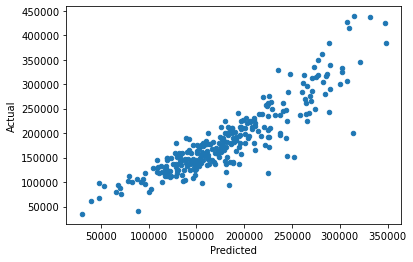

In [55]:
y_pred = regression.predict(X_test)

y_pred_compare = ({'Actual': y_test, 'Predicted': y_pred})

Predicted = np.array(y_pred)
Actual = np.array(y_test)

display = pd.DataFrame({'Predicted': list(Predicted), 'Actual': list(Actual)})

display

display.plot(kind="scatter", x= "Predicted", y = "Actual")

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["independent variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,independent variable,VIF
0,GrLivArea,11.648110
1,GarageArea,9.151446
2,TotalBsmtSF,12.372047
3,Aircond,9.543796


Though we have somewhat high VIF, which means our independent variables are correlated, it is reasonable to expect that a house with large living area above ground (GrLivArea) will have large basement area and large garage area.


In [68]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

dependent_variable = df['SalePrice']
Independent_variables = df.drop(columns = {'SalePrice', 'CentralAir'})

# adding an intercept term
Independent_variables = sm.add_constant(Independent_variables)

C:\Users\karji\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [72]:
model1 = sm.OLS(dependent_variable, Independent_variables)

model1 = model1.fit()


# get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     941.5
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:06:47   Log-Likelihood:                -16816.
No. Observations:                1408   AIC:                         3.364e+04
Df Residuals:                    1403   BIC:                         3.367e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.357e+04   5191.918    -12.244      0.000   -7.38e+04   -5.34e+04
GrLivArea      68.9247      2.337     29.489      0.000      64.340      73.510
GarageArea     92.9492      5.850     15.890      0.000      81.474     104.424
TotalBsmtSF    59.7966      3.204     18.665      0.000      53.512      66.081
Aircond      3.406e+04   4375.577      7.784      0.000    2.55e+04    4.26e+04
==============================================================================
Omnibus:                       83.580   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.754
Skew:                           0.044   Prob(JB):                     1.24e-73
Kurtosis:                       5.391   Cond. No.                     1.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we see from the above OLS regression, the P-value for all the independent variables indicates that, the coefficient term of each independent variable is significant at 5 percent level. And the null hypothesis that the coefficient equals to zero can be rejected at 5 per cent (in fact, this is significant at 1 per cent level too.)

In [89]:
dep_v = df['SalePrice']
indep_v = df.drop(columns = {'SalePrice', 'CentralAir'})

# adding an intercept term

indep_v = sm.add_constant(indep_v)

C:\Users\karji\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [95]:
indep_v_train, indep_v_test, dep_v_train, dep_v_test = train_test_split(indep_v, dep_v, test_size = 0.2, random_state = 42)

model_tt = sm.OLS(dep_v_train, indep_v_train)

model_tt = model_tt.fit()


# get the model summary
model_tt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     691.9
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          6.73e-301
Time:                        18:30:16   Log-Likelihood:                -13480.
No. Observations:                1126   AIC:                         2.697e+04
Df Residuals:                    1121   BIC:                         2.699e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.196e+04   5917.465    -10.471      0.000   -7.36e+04   -5.04e+04
GrLivArea      67.8726      2.650     25.613      0.000      62.673      73.072
GarageArea     90.5693      6.663     13.593      0.000      77.497     103.642
TotalBsmtSF    59.6553      3.656     16.317      0.000      52.482      66.829
Aircond      3.441e+04   4980.350      6.909      0.000    2.46e+04    4.42e+04
==============================================================================
Omnibus:                       68.561   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.949
Skew:                           0.119   Prob(JB):                     3.57e-57
Kurtosis:                       5.342   Cond. No.                     1.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""